<h1>Аналіз та обробка БМД</h1>
<h2>БС-82</h2>
<h3 style="font-family:sans-serif;">Микита Любшин<h3>
  <link rel ="stylesheet" href="style.css"></link>

<h3>Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.
</h3>

In [131]:
import seaborn as sns
import numpy as np
import matplotlib.backends.backend_pdf as pdf
import matplotlib.pyplot as plt
import pandas as pd

myData = {};
myData["N_Distribution_1"]=sorted(np.random.normal(0, 1,size=20))  
myData["N_Distribution_2"]=sorted(np.random.normal(0, 3,size=20))  
myData["N_Distribution_3"]=sorted(np.random.normal(0, 5,size=20))  
myData["Exponential Distribution1"]=sorted(np.random.exponential(1,size=20))
myData["Exponential distribution2"]=sorted(np.random.exponential(3,size=20))
myData["Exponential Distribution3"]=sorted(np.random.exponential(5, size=20))

for i, k in myData.items():
    print(f" { i } - {k} \n")

 N_Distribution_1 - [-1.9933294485245177, -1.941875789329866, -1.731115289919707, -1.4672682167561863, -1.386761308872113, -1.221203207492488, -0.954492447685494, -0.8635254508928677, -0.5036922715808418, -0.10025518665678346, -0.013395526534751156, 0.26166192821541573, 0.29073672211307255, 0.30478492945652086, 0.3859490413533509, 0.5486128461964653, 0.6045980795793287, 0.7195062143350469, 1.1321883510283552, 2.0391110451607832] 

 N_Distribution_2 - [-5.478502987335601, -3.574342619845995, -3.084941037888899, -2.5159039803520757, -1.8158345676928498, -1.453132206146062, -0.9582448889455853, -0.3826662521617469, -0.229264924801783, 0.21613327290370038, 1.1102632222936557, 1.463221598591899, 1.7301895155886498, 1.794709547293185, 2.481628884233982, 3.5420259490913453, 4.210368318877152, 4.384520304693957, 4.454684033468851, 6.465536064297923] 

 N_Distribution_3 - [-10.935187432331851, -9.680327324057432, -8.919495968751821, -8.476372347461341, -5.9824261452767455, -4.351716856591073, -

In [133]:
def ShapiroWilk(array, n=20):
    a = pd.read_excel("Coeficients for the W test for normality.xlsx")[n]/10000
    w_table = pd.read_excel("Рoints of the distribution of W .xlsx")["Unnamed: 1"][n]/1000

    k = int(n/2 if (n%2==0) else (n-1)/2)
    m = np.mean(array)
    nm = 0
    for i in array:
        nm += (i-m)**2
    b = 0
    for i in range(k):
        b += a[i]*(array[n-i-1] - array[i])
    w = (b**2)/nm
    if(w > w_table):
        return "normal"
    else:
        return "non-normal"

for i in myData.values():
    print(ShapiroWilk(i, 20))

normal
normal
normal
non-normal
non-normal
non-normal


Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf


<h4>Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h4>

In [134]:
table=pd.DataFrame(columns=["Variable","Statistics","Distribution"]) 
table

,Variable,Statistics,Distribution


<h4>Занести в стовпчик Variable назви змінних.</h4>

In [135]:
table['Variable']=myData.keys()
table

,Variable,Statistics,Distribution
0,N_Distribution_1,NaN,NaN
1,N_Distribution_2,NaN,NaN
2,N_Distribution_3,NaN,NaN
3,Exponential Distribution1,NaN,NaN
4,Exponential distribution2,NaN,NaN
5,Exponential Distribution3,NaN,NaN


<h4>Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h4>

In [136]:
table["Distribution"]=['normal' if 'N_Distribution' in i else 'non-normal'
                          for i in table["Variable"]]
table

,Variable,Statistics,Distribution
0,N_Distribution_1,NaN,normal
1,N_Distribution_2,NaN,normal
2,N_Distribution_3,NaN,normal
3,Exponential Distribution1,NaN,non-normal
4,Exponential distribution2,NaN,non-normal
5,Exponential Distribution3,NaN,non-normal


<h4></h4>

<h4>Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h4>

In [140]:
n_df=pd.DataFrame((myData), columns=myData.keys())

for _,val in table.iterrows():
    val["Statistics"] = "{:.3f} [{:.3f}]".format(
        n_df[val["Variable"]].mean(),n_df[val["Variable"]].std()) if val["Distribution"] != "non-normal" else "{:.3f} [{:.3f}; {:.3f}]".format(
        n_df[val["Variable"]].median(),n_df[val["Variable"]].quantile(0.25),n_df[val["Variable"]].quantile(0.75))
        
table

,Variable,Statistics,Distribution
0,N_Distribution_1,-0.294 [1.112],normal
1,N_Distribution_2,0.618 [3.116],normal
2,N_Distribution_3,-2.797 [4.363],normal
3,Exponential Distribution1,0.915 [0.409; 1.355],non-normal
4,Exponential distribution2,1.565 [0.696; 4.444],non-normal
5,Exponential Distribution3,3.361 [1.749; 9.126],non-normal


<h4>Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].
Зберегти таблицю в пдф форматі</h4>

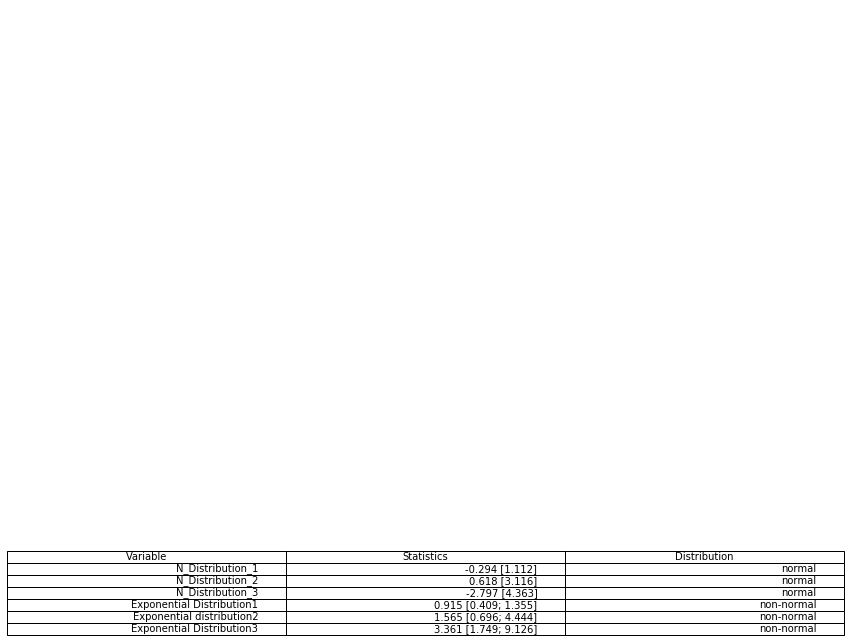

In [141]:
f,ax=plt.subplots(figsize=(15,10))
ax.axis('off')
table_to_save=ax.table(cellText=table.values, colLabels=table.columns)

to_save=pdf.PdfPages("table.pdf") 
to_save.savefig(f) 
to_save.close()